# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna


Processing Record 2 of Set 1 | koneurgench
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | huesca
Processing Record 6 of Set 1 | shofirkon shahri
City not found. Skipping...
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | solleftea
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | arar
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | port augusta
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | amos
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | hauterive
Processing Record 23 of Set 1 | grytviken
Process

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,295.33,71,20,6.17,US,1691006396
1,adamstown,-25.0660,-130.1015,294.13,66,100,7.68,PN,1691006396
2,iqaluit,63.7506,-68.5145,285.00,66,20,2.57,CA,1691006396
3,huesca,42.1362,-0.4087,302.53,51,0,4.02,ES,1691006397
4,tiksi,71.6872,128.8694,277.97,96,100,3.67,RU,1691006397


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,295.33,71,20,6.17,US,1691006396
1,adamstown,-25.0660,-130.1015,294.13,66,100,7.68,PN,1691006396
2,iqaluit,63.7506,-68.5145,285.00,66,20,2.57,CA,1691006396
3,huesca,42.1362,-0.4087,302.53,51,0,4.02,ES,1691006397
4,tiksi,71.6872,128.8694,277.97,96,100,3.67,RU,1691006397


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

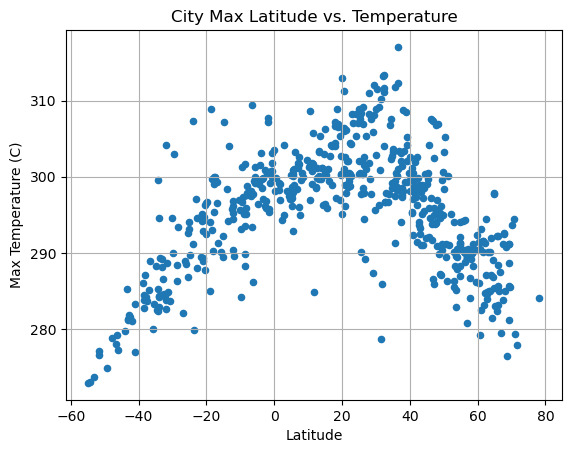

In [40]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

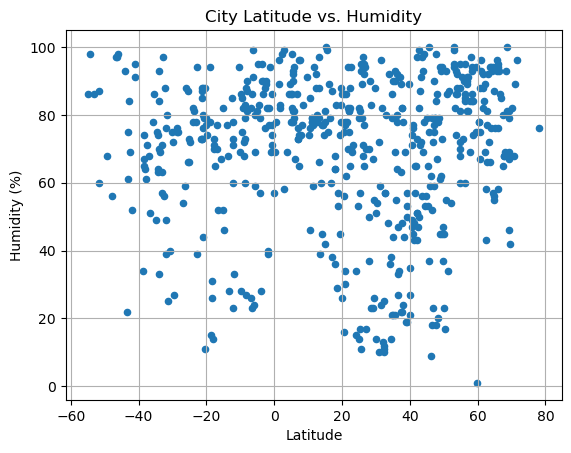

In [41]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

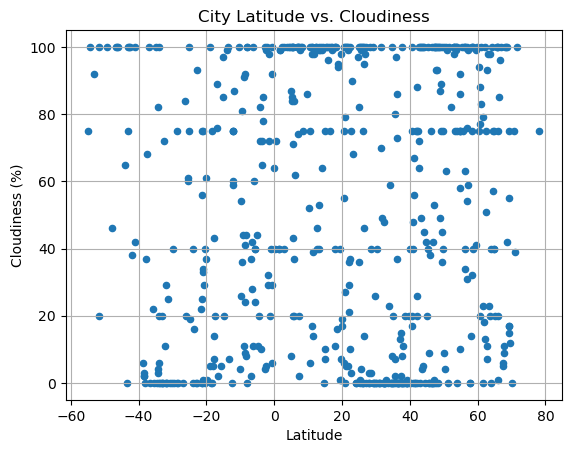

In [42]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat","Cloudiness")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

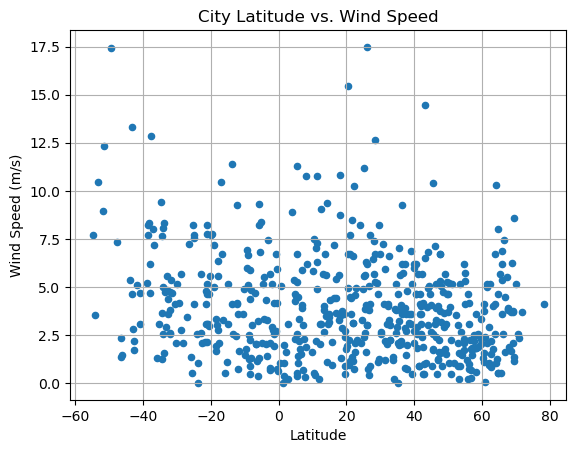

In [43]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, eqn_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"R-value: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=10, color="red")
    plt.scatter(x_values, y_values)
    plt.xlabel(f"{x_values.name}")
    plt.ylabel(f"{y_values.name}")
    

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,295.33,71,20,6.17,US,1691006396
2,iqaluit,63.7506,-68.5145,285.00,66,20,2.57,CA,1691006396
3,huesca,42.1362,-0.4087,302.53,51,0,4.02,ES,1691006397
4,tiksi,71.6872,128.8694,277.97,96,100,3.67,RU,1691006397
5,solleftea,63.1667,17.2667,290.07,92,98,3.99,SE,1691006398


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,294.13,66,100,7.68,PN,1691006396
6,puerto natales,-51.7236,-72.4875,276.59,87,100,8.93,CL,1691006398
7,waitangi,-43.9535,-176.5597,279.72,93,65,5.36,NZ,1691006398
8,uturoa,-16.7333,-151.4333,299.26,70,89,6.70,PF,1691006399
12,port augusta,-32.5000,137.7667,284.56,56,72,4.36,AU,1691006283


###  Temperature vs. Latitude Linear Regression Plot

R-value: -0.6208028525074436


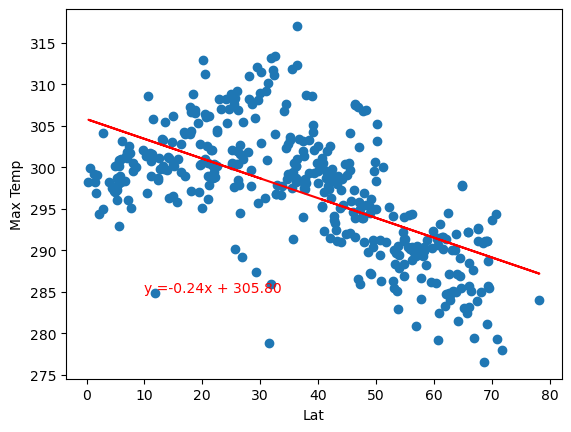

In [89]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (10, 285))

R-value: 0.8064833085448704


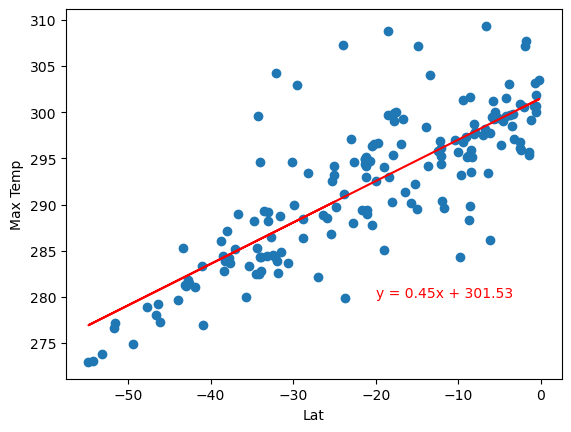

In [94]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-20,280))

**Discussion about the linear relationship:** It appears that temperature decreases as you move further from the equator.

### Humidity vs. Latitude Linear Regression Plot

R-value: 0.03685448075774387


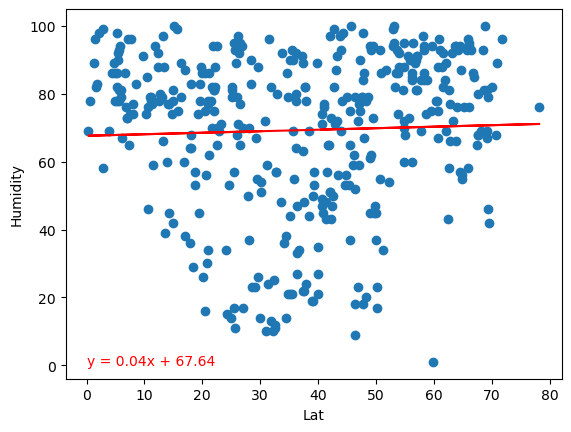

In [111]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (0,0))

R-value: -0.01230501745856671


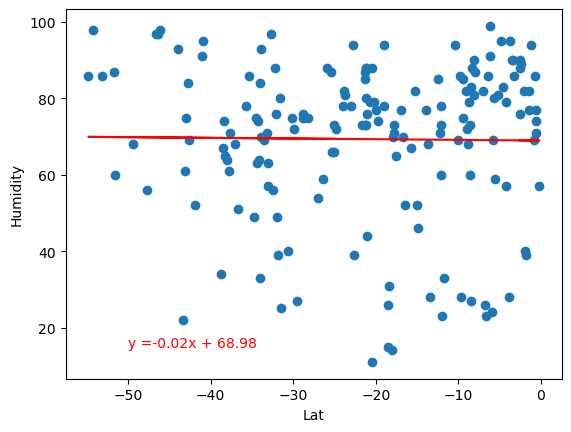

In [110]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50,15))

**Discussion about the linear relationship:** R-values suggesting there is no correlation between humidity and distance from equator.

### Cloudiness vs. Latitude Linear Regression Plot

R-value: -0.05439564165161897


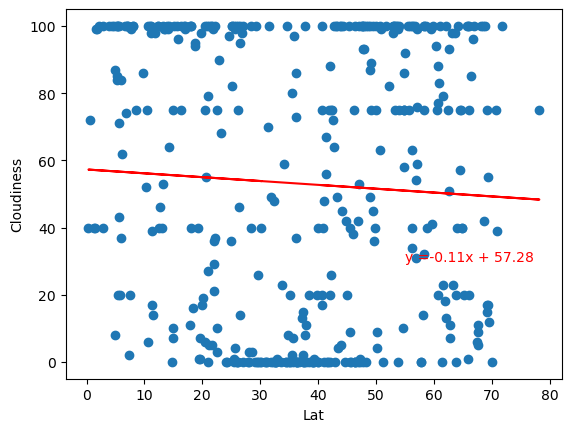

In [108]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (55,30))

R-value: 0.020354595047969982


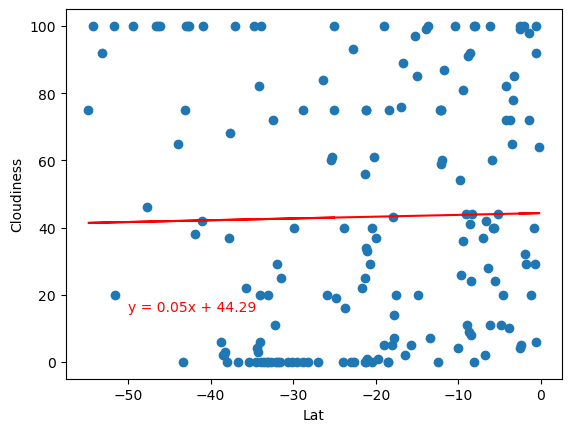

In [104]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-50,15))

**Discussion about the linear relationship:** Again, it would appear that there is no correlation between cloudiness and distance from equator

### Wind Speed vs. Latitude Linear Regression Plot

R-value: -0.131786130577063


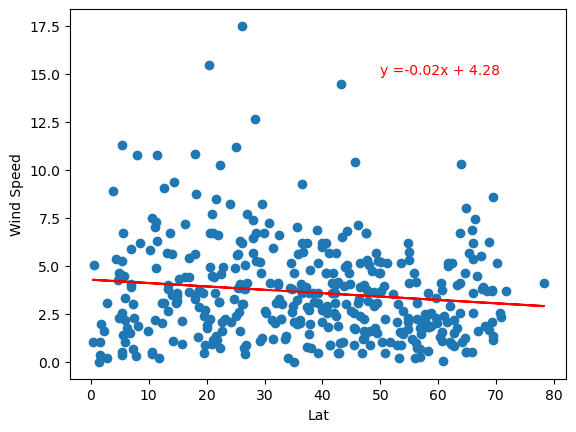

In [102]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (50,15))

R-value: -0.3075735008340256


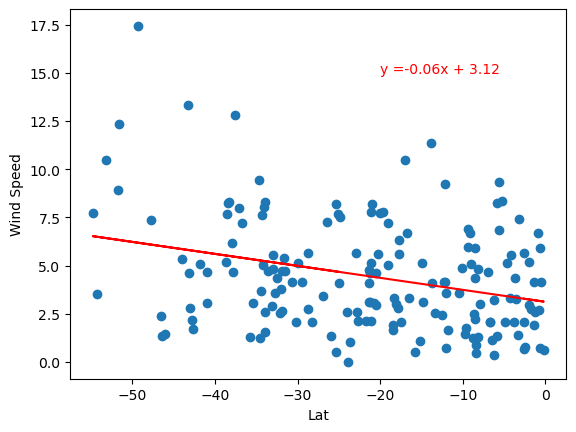

In [98]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-20,15))

**Discussion about the linear relationship:** There is again no correlation observed when considering latitude and wind speed. 